<a href="https://colab.research.google.com/github/Gavinlai01/Data-Mining-Project/blob/main/Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install required package

In [ ]:
!pip install requests
!pip install Ta-Lib

# Import Library

In [ ]:
import pandas as pd
import numpy as np

## Downalod data

In [ ]:
import requests
import pandas as pd
years = ["2017", "2018", "2019", "2020", "2021"]
DF_list= list()
for x in years:
  url = "https://www.cryptodatadownload.com/cdd/Bitstamp_BTCUSD_" + x + "_minute.csv"
  data = requests.get(url)
  lines = data.text.splitlines()
  lines.pop(0)
  lines.pop(0)
  lines.reverse()
  df = pd.DataFrame([sub.split(",") for sub in lines])
  DF_list.append(df)
data = pd.concat(DF_list)
data = data.rename(columns = {0:'unix', 1:'time', 2:'symbol', 3:'open', 4:'high', 5:'low', 6:'close', 7:'Volume BTC', 8:'Volume USD'})
#data.set_index('time', inplace=True)
data = data.sort_values(by="time")
data['open']=data['open'].astype(float)
data['high']=data['high'].astype(float)
data['low']=data['low'].astype(float)
data['close']=data['close'].astype(float)
data['Volume BTC']=data['Volume BTC'].astype(float)
data['Volume USD']=data['Volume USD'].astype(float)
#data['close'].plot(legend=True,figsize=(36,15))
data

,unix,time,symbol,open,high,low,close,Volume BTC,Volume USD
0,1483228860,2017-01-01 00:01:00,BTC/USD,966.34,966.34,966.34,966.34,7.610000,7353.847400
1,1483228920,2017-01-01 00:02:00,BTC/USD,966.16,966.37,966.16,966.37,8.087376,7815.397864
2,1483228980,2017-01-01 00:03:00,BTC/USD,966.37,966.37,966.37,966.37,0.000000,0.000000
3,1483229040,2017-01-01 00:04:00,BTC/USD,966.37,966.37,966.37,966.37,0.000000,0.000000
4,1483229100,2017-01-01 00:05:00,BTC/USD,966.43,966.43,966.43,966.43,0.107000,103.408010
...,...,...,...,...,...,...,...,...,...
631091,1647324720,2022-03-15 06:12:00,BTC/USD,38842.71,38848.88,38842.71,38848.88,0.012246,475.743384
631092,1647324780,2022-03-15 06:13:00,BTC/USD,38833.53,38833.53,38818.51,38818.51,1.923735,74676.543027
631093,1647324840,2022-03-15 06:14:00,BTC/USD,38824.27,38831.78,38822.35,38830.90,0.238441,9258.882510
631094,1647324900,2022-03-15 06:15:00,BTC/USD,38810.51,38844.44,38810.51,38831.78,0.481375,18692.657805


# Missing Value Checking

In [ ]:
#Check if there is any missing value

label = ['open', 'high', 'low', 'close', 'Volume BTC', 'Volumn USD']
for x in label:
  if (len((data[data[label[0]].isna()].index)) == 0):
    print(x + ' column is not empty')
  else:
    print('some values of ' + x + 'are empty')
del label

open column is not empty
high column is not empty
low column is not empty
close column is not empty
Volume BTC column is not empty
Volumn USD column is not empty


## Decision Labelling

In [ ]:
# Joseph: I changed the 'threshold' into upper and lower for better customization
upper = 0.005
lower = 0.005
window = 21 # how long is our window
def calResult(x):
    for i in x:
        if i > x[0]*(1 + upper):
            return 1
        elif i < x[0]* (1 - lower):
            return -1
    return 0
data['decision'] = data['close'].rolling(window=window, closed='both', min_periods=window).apply(calResult, raw=True)
#hist = data['decision'].hist(bins=3)
#data[data['decision']==1].count() 
#data[data['decision']==-1].count()
#data[data['decision']==0].count()
data = data.dropna()

## Data Processing

In [ ]:
import talib
data['SMA20'] = talib.SMA(data['close'], timeperiod=20) #overlap
data['SMA50'] = talib.SMA(data['close'], timeperiod=50) #overlap
data['EMA20'] = talib.EMA(data['close'], timeperiod=20) #overlap
data['EMA50'] = talib.EMA(data['close'], timeperiod=50) #overlap
data['EMA200'] = talib.EMA(data['close'], timeperiod=200) #overlap
data['Upper'], data['Mid'], data['Lower'] = talib.BBANDS(data['close'], nbdevup=2, nbdevdn=2, timeperiod=20) #overlap
data['SAR'] = talib.SAR(data['close'], data['low'], acceleration=0, maximum=0) #overlap
data['ADX'] = talib.ADX(data['high'], data['low'], data['close'], timeperiod=14) #Momentum
data['MACD'], data['Signal'], data['Hist'] = talib.MACD(data['close'], fastperiod=12, slowperiod=26, signalperiod=9) #Momentum
data['RSI'] = talib.RSI(data['close'], timeperiod=14) #Momentum
data['K'], data['D'] = talib.STOCH(data['high'], data['low'], data['close'].values, fastk_period=9, slowk_period=3, #Momentum
                               slowk_matype=0, slowd_period=3, slowd_matype=0)
data['K'].fillna(0,inplace=True)
data['D'].fillna(0,inplace=True)
data['J']=3*data['K']-2*data['D']
data['Willam R'] = talib.WILLR(data['high'], data['low'], data['close'], timeperiod=14)  #Momentum
data['slowk'], data['slowd'] = talib.STOCH(data['high'], data['low'],data['close']) #Momentum
data['ADOSC'] = talib.ADOSC(data['high'], data['low'], data['close'], data['Volume BTC']) #Momentum
data['MFI'] = talib.MFI(data['high'], data['low'], data['close'], data['Volume BTC']) #Momentum
data['aroondown'], data['aroonup'] = talib.AROON(data['close'], data['low']) #Volume

data = data.dropna()
data

/var/folders/qs/98khxqkx2l75wppyn602b1480000gn/T/ipykernel_16495/353379800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA20'] = talib.SMA(data['close'], timeperiod=20) #overlap
/var/folders/qs/98khxqkx2l75wppyn602b1480000gn/T/ipykernel_16495/353379800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA50'] = talib.SMA(data['close'], timeperiod=50) #overlap
/var/folders/qs/98khxqkx2l75wppyn602b1480000gn/T/ipykernel_16495/353379800.py:4: SettingWithCopyWarning: 
A value is trying to b

,unix,time,symbol,open,high,low,close,Volume BTC,Volume USD,decision,...,K,D,J,Willam R,slowk,slowd,ADOSC,MFI,aroondown,aroonup
219,1483242000,2017-01-01 03:40:00,BTC/USD,963.99,963.99,963.99,963.99,1.000000,963.990000,0.0,...,0.000000,33.333333,-66.666667,-100.000000,-1.894781e-14,3.868510e-14,-3.034845,1.233575,0.000000,85.714286
220,1483242060,2017-01-01 03:41:00,BTC/USD,963.99,963.99,963.99,963.99,0.000000,0.000000,0.0,...,0.000000,11.111111,-22.222222,-100.000000,-1.894781e-14,3.868510e-14,-3.061904,0.251752,100.000000,78.571429
221,1483242120,2017-01-01 03:42:00,BTC/USD,964.00,964.00,964.00,964.00,0.080000,77.120000,0.0,...,33.333333,11.111111,77.777778,-0.000000,3.333333e+01,1.111111e+01,-2.794619,1.199306,92.857143,100.000000
222,1483242180,2017-01-01 03:43:00,BTC/USD,964.00,964.00,963.99,963.99,1.054000,1016.045460,0.0,...,33.333333,22.222222,55.555556,-100.000000,3.333333e+01,2.222222e+01,-2.766583,1.070830,100.000000,92.857143
223,1483242240,2017-01-01 03:44:00,BTC/USD,964.00,964.00,964.00,964.00,0.017000,16.388000,0.0,...,66.666667,44.444444,111.111111,-0.000000,6.666667e+01,4.444444e+01,-2.503606,1.028858,92.857143,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631091,1647324720,2022-03-15 06:12:00,BTC/USD,38842.71,38848.88,38842.71,38848.88,0.012246,475.743384,0.0,...,93.349280,93.046878,93.954084,-0.000000,9.230059e+01,9.195171e+01,0.004127,42.693744,28.571429,100.000000
631092,1647324780,2022-03-15 06:13:00,BTC/USD,38833.53,38833.53,38818.51,38818.51,1.923735,74676.543027,0.0,...,89.695304,92.131288,84.823336,-29.377056,7.822471e+01,8.760863e+01,-0.612987,17.837061,21.428571,92.857143
631093,1647324840,2022-03-15 06:14:00,BTC/USD,38824.27,38831.78,38822.35,38830.90,0.238441,9258.882510,0.0,...,83.299004,88.781196,72.334619,-17.392145,6.533305e+01,7.861945e+01,-0.748009,25.339220,14.285714,85.714286
631094,1647324900,2022-03-15 06:15:00,BTC/USD,38810.51,38844.44,38810.51,38831.78,0.481375,18692.657805,0.0,...,76.061828,83.018712,62.148059,-16.540917,5.047769e+01,6.467848e+01,-0.696378,35.768279,7.142857,78.571429


# Signal Conversion
## RSI Signal

In [ ]:
def RSI_Signal(row):
    if row['RSI'] >= 80:
        return 2 #'Highly Overbought' 
    elif row['RSI'] > 50 and row['RSI'] < 80:
        return 1 #'Overbought'
    elif row['RSI'] == 50:
        return 0 #'Normal'
    elif row['RSI'] > 20 and row['RSI'] < 50:
        return -1 #'Oversold'
    return -2 #'Highly Oversold'
data['RSI Signal'] = data.apply(lambda row: RSI_Signal(row), axis=1)
#print(data[data['RSI Signal']=='Highly OverSold'].count())
#print(data[data['RSI Signal']=='Highly Overbought'].count())
#print(data[data['RSI Signal']=='Oversold'].count())
#print(data[data['RSI Signal']=='Overbought'].count())

## SMA Signal

In [ ]:
diff = np.sign(data['SMA20'] - data['SMA50'])
data['SMA Signal'] = np.sign(diff-diff.shift(1))

## EMA Signal

In [ ]:
diff = np.sign(data['EMA20'] - data['EMA50'])
data['EMA Signal'] = np.sign(diff-diff.shift(1))

## KDJ Signal

In [ ]:
diff = np.sign(data['K'] - data['D'])
data['KDJ Signal'] = np.sign(diff-diff.shift(1))

## MACD Signal

In [ ]:
diff = np.sign(data['MACD'] - data['Signal'])
data['MACD Signal'] = np.sign(diff-diff.shift(1))

## Williams' %R Signal

In [ ]:
def R_Signal(row):
    if row['Willam R'] >= -20 and row['Willam R'] <= 0:
        return 1 # Overbought
    elif row['Willam R'] >= -100 and row['Willam R'] <= -80:
        return -1 # OverSell
    return 0
data['William R Signal'] = data.apply(lambda row: R_Signal(row), axis=1)

## STOCH Signal

In [ ]:
# stochastic oscillator
def STOCH_signal(row):
    if row['slowk'] >= 80:
        return 1
    elif row['slowk'] <=20:
        return -1
    return 0
data['STOCH Signal'] = data.apply(lambda row: STOCH_signal(row), axis=1)

## ADOSC Signal

In [ ]:
sign = np.sign(data['ADOSC'])
data['ADOSC Signal'] = np.sign(sign - sign.shift(1))

## Aroon Signal

In [ ]:
def Aroon_signal(row):
    if row['aroonup'] > 80:
        return 1
    elif row['aroonup'] < 20:
        return -1
    return 0
data['Aroon Signal'] = data.apply(lambda row: Aroon_signal(row), axis=1)

## MFI Signal

In [ ]:
def MFI_signal(row):
    if row['MFI'] > 80:
        return -1
    elif row['MFI'] < 20:
        return 1
    return 0
data['MFI Signal'] = data.apply(lambda row: MFI_signal(row), axis=1)

In [ ]:
data = data.dropna()

# Feature Reduction
## Correlation

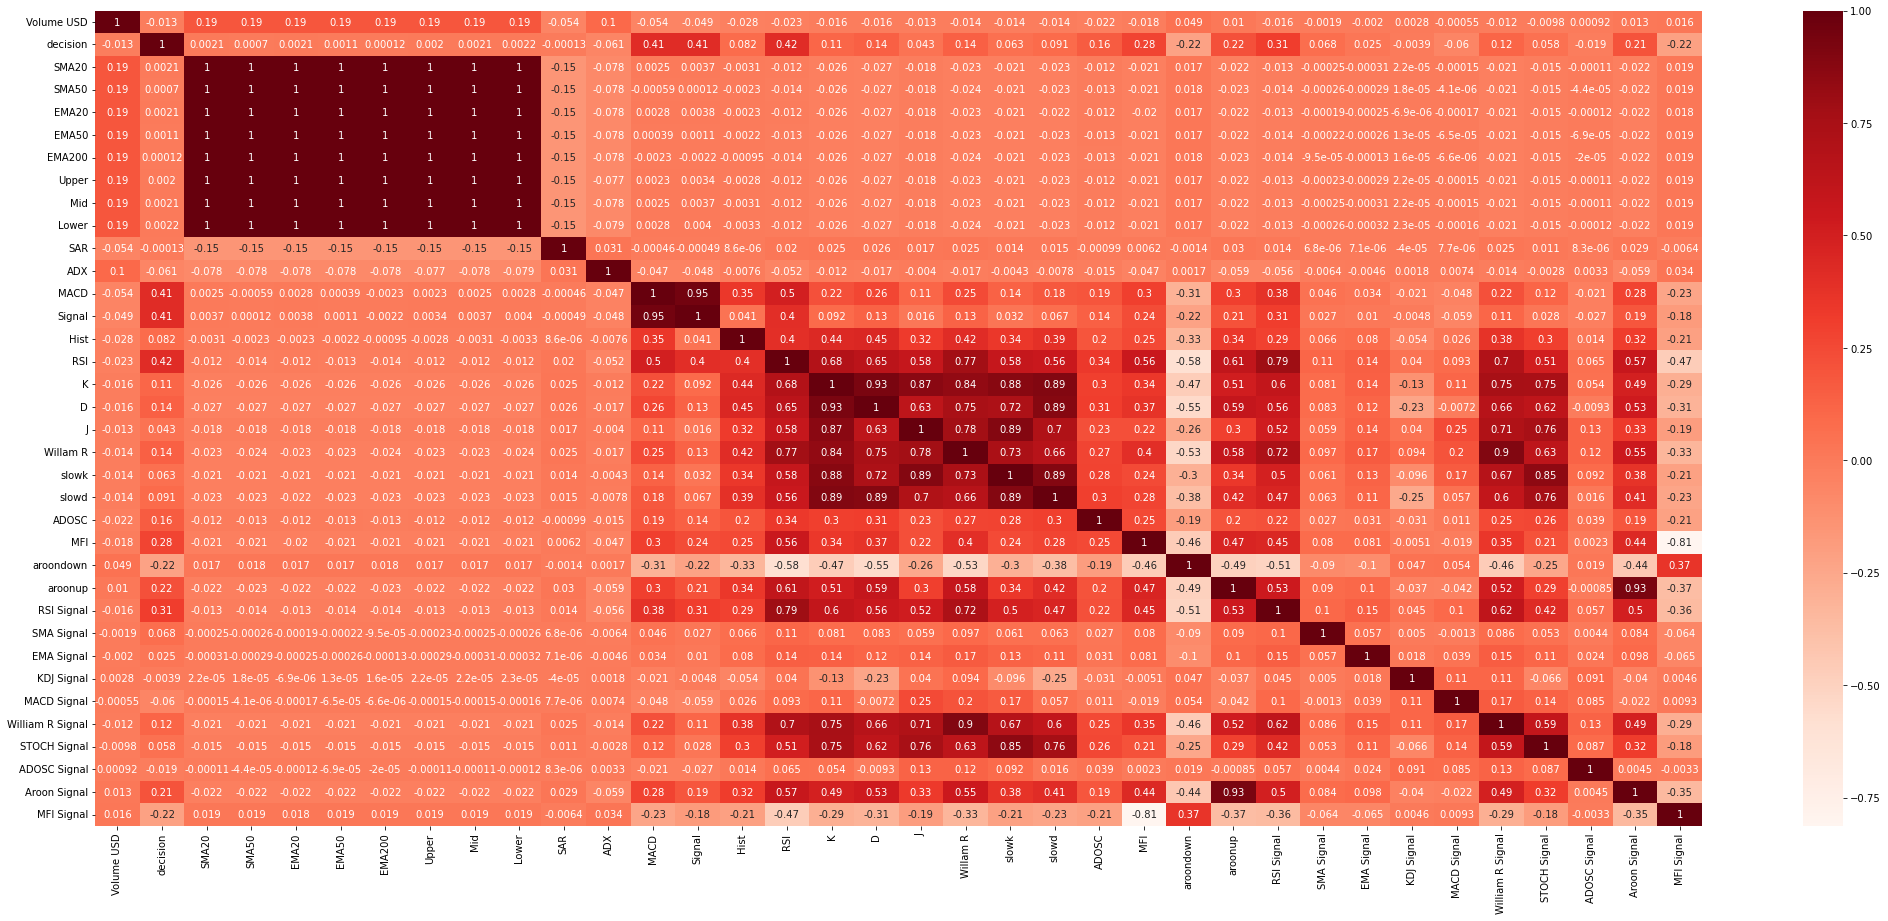

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(36,15))
cor_data = data.iloc[:, 8:]
cor = cor_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Correlation Reduction

In [ ]:
cor_target = abs(cor["decision"])
cor_target[cor_target>0.2]

decision        1.000000
MACD            0.413383
Signal          0.413468
RSI             0.417334
MFI             0.275392
aroondown       0.221109
aroonup         0.218946
RSI Signal      0.309374
Aroon Signal    0.205728
MFI Signal      0.216157
Name: decision, dtype: float64

In [ ]:
CorRed_data = data.iloc[:,[19,20,21,23,31,32]]
CorRed_data

,ADX,MACD,Signal,RSI,MFI,aroondown
220,12.840678,0.010555,0.014420,51.363687,0.251752,100.000000
221,12.611607,0.010286,0.013593,52.977319,1.199306,92.857143
222,12.583838,0.009160,0.012706,51.149757,1.070830,100.000000
223,12.558053,0.008971,0.011959,52.899570,1.028858,92.857143
224,12.735750,0.007923,0.011152,50.934745,1.023969,100.000000
...,...,...,...,...,...,...
631091,18.567193,13.429051,4.476620,67.951488,42.693744,28.571429
631092,18.870750,14.188037,6.418903,58.349661,17.837061,21.428571
631093,19.152623,15.609372,8.256997,60.784255,25.339220,14.285714
631094,19.822483,16.615269,9.928651,60.958808,35.768279,7.142857


## Category Reduction
### Overlap Feature Reduction

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
overlap_feature = data.iloc[:, 9:18]
print(overlap_feature)
overlap_feature = StandardScaler().fit_transform(overlap_feature)
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(overlap_feature)
data['Overlap_feature'] = pd.DataFrame(data = principalComponents, columns = ['principal component 1'])

        decision       SMA20       SMA50         EMA20         EMA50  \
220          0.0    963.9930    963.9548    963.988706    963.971391   
221          0.0    963.9935    963.9688    963.989782    963.972513   
222          0.0    963.9940    963.9826    963.989803    963.973198   
223          0.0    963.9950    963.9966    963.990774    963.974250   
224          0.0    963.9960    964.0104    963.990700    963.974867   
...          ...         ...         ...           ...           ...   
631091       0.0  38777.5240  38770.7986  38786.845464  38777.568118   
631092       0.0  38779.8545  38772.5226  38789.861134  38779.173682   
631093       0.0  38782.2510  38774.2242  38793.769597  38781.202165   
631094       0.0  38785.5315  38776.1276  38797.389636  38783.185609   
631095       0.0  38789.2235  38778.3820  38802.336337  38785.779507   

              EMA200         Upper         Mid         Lower  
220       964.469283    964.011000    963.9930    963.975000  
221      

/var/folders/qs/98khxqkx2l75wppyn602b1480000gn/T/ipykernel_16495/473501827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Overlap_feature'] = pd.DataFrame(data = principalComponents, columns = ['principal component 1'])


In [ ]:
data['Overlap_feature']

220      -2.496064
221      -2.496062
222      -2.496060
223      -2.496058
224      -2.496057
            ...   
631091   -1.327114
631092   -1.326900
631093   -1.325659
631094   -1.325618
631095   -1.325474
Name: Overlap_feature, Length: 2695395, dtype: float64

In [ ]:
Momentum_feature = data.iloc[:, 18:31]
print(Momentum_feature)
#Momentum_feature = StandardScaler().fit_transform(Momentum_feature)
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(Momentum_feature)
data['Momentum_feature'] = pd.DataFrame(data = principalComponents, columns = ['principal component 1'])

           SAR        ADX       MACD     Signal      Hist        RSI  \
220     966.99  12.840678   0.010555   0.014420 -0.003864  51.363687   
221     966.99  12.611607   0.010286   0.013593 -0.003307  52.977319   
222     966.99  12.583838   0.009160   0.012706 -0.003546  51.149757   
223     966.99  12.558053   0.008971   0.011959 -0.002988  52.899570   
224     966.99  12.735750   0.007923   0.011152 -0.003229  50.934745   
...        ...        ...        ...        ...       ...        ...   
631091  751.34  18.567193  13.429051   4.476620  8.952432  67.951488   
631092  751.34  18.870750  14.188037   6.418903  7.769133  58.349661   
631093  751.34  19.152623  15.609372   8.256997  7.352375  60.784255   
631094  751.34  19.822483  16.615269   9.928651  6.686618  60.958808   
631095  751.34  20.596998  18.614017  11.665725  6.948293  64.365382   

                K          D           J    Willam R         slowk  \
220      0.000000  11.111111  -22.222222 -100.000000 -1.894781e-1

In [ ]:
data['Momentum_feature']

### Momentum Feature Reduction

In [ ]:
Momentum_feature = data.iloc[:, 18:31]
print(Momentum_feature)
Momentum_feature = StandardScaler().fit_transform(Momentum_feature)
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(Momentum_feature)
data['Momentum_feature'] = pd.DataFrame(data = principalComponents, columns = ['principal component 1'])

### Volume Feature Reduction

In [ ]:
Volume_feature = data.iloc[:,31:33]
print(Volume_feature)
Volume_feature = StandardScaler().fit_transform(Volume_feature)
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(Volume_feature)
data['Volume_feature'] = pd.DataFrame(data = principalComponents, columns = ['principal component 1'])

In [ ]:
data

## Correlation between numerical features and decision Label

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(36,15))
cor_data = data.iloc[:, [8,43,44,45]]
cor = cor_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
FeaRed_data = data.iloc[:,43:47]
FeaRed_data

# Model Training

In [ ]:
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier 
from sklearn.preprocessing import StandardScaler
import joblib

## Model Training (Normal)

In [ ]:
feature = data.iloc[:, 9:34]
train_data = feature.dropna()
feature_names = train_data.columns[:-1]
y = data[["decision"]]
train_data = train_data.to_numpy()
X = train_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

### Decision Tree Model

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=20)
clf = clf.fit(X_train, y_train)
joblib.dump(clf, 'tree_classifier.pkl')
clf = joblib.load('tree_classifier.pkl')
train_score = accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))
test_score = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
print("The training accuracies of obtained decision tree is " + str(train_score))
print("The testing accuracies of obtained accuracies of obtained decision tree is " + str(test_score))
fig=ConfusionMatrixDisplay.from_predictions(y_test, clf.predict(X_test))
fig.figure_.suptitle("Confusion Matrix for Tree Classifier")
plt.show()

### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
joblib.dump(logreg, 'Logistic_classifier.pkl')
Logistic_clf = joblib.load('Logistic_classifier.pkl')
train_score = accuracy_score(y_true=y_train, y_pred=Logistic_clf.predict(X_train))
test_score = accuracy_score(y_true=y_test, y_pred=Logistic_clf.predict(X_test))
print("The training accuracies of obtained logistic regression is " + str(train_score))
print("The testing accuracies of obtained accuracies of obtained logistic regression is " + str(test_score))
fig=ConfusionMatrixDisplay.from_predictions(y_test, logreg.predict(X_test))
fig.figure_.suptitle("Confusion Matrix for Logistic Regression Training")
plt.show()

### KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train,y_train)

joblib.dump(model, 'KNN_classifier.pkl')
KNN_clf = joblib.load('KNN_classifier.pkl')
train_score = accuracy_score(y_true=y_train, y_pred=KNN_clf.predict(X_train))
test_score = accuracy_score(y_true=y_test, y_pred=KNN_clf.predict(X_test))
print("The training accuracies of obtained KNN is " + str(train_score))
print("The testing accuracies of obtained accuracies of obtained KNN is " + str(test_score))
#Predict Output
fig=ConfusionMatrixDisplay.from_predictions(y_test, KNN_clf.predict(X_test))
fig.figure_.suptitle("Confusion Matrix for KNN Training")
plt.show()

### MLP Model

In [ ]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)
y_train = y_train.astype(float)
y_test = y_test.astype(float)
MLPclf = MLPClassifier(hidden_layer_sizes=(64,32),activation="relu",random_state=1).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
joblib.dump(MLPclf, 'MLP_classifier.pkl')
MLP_clf = joblib.load('MLP_classifier.pkl')
train_score = accuracy_score(y_true=y_train, y_pred=MLP_clf.predict(X_train))
test_score = accuracy_score(y_true=y_test, y_pred=MLP_clf.predict(X_test))
print("The training accuracies of obtained decision tree is " + str(train_score))
print("The testing accuracies of obtained accuracies of obtained decision tree is " + str(test_score))
fig=ConfusionMatrixDisplay.from_predictions(y_test, MLP_clf.predict(X_testscaled))
fig.figure_.suptitle("Confusion Matrix for MLP Training")
plt.show()

## Model Training (Signal)

In [ ]:
Signal = data.iloc[:, 35:44]
train_data = feature.dropna()
feature_names = train_data.columns[:-1]
y = data[["decision"]]
train_data = train_data.to_numpy()
X = train_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

### Decision Tree Model

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=20)
clf = clf.fit(X_train, y_train)
joblib.dump(clf, 'tree_classifier_Signal.pkl')
clf = joblib.load('tree_classifier_Signal.pkl')
train_score = accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))
test_score = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
print("The training accuracies of obtained decision tree is " + str(train_score))
print("The testing accuracies of obtained accuracies of obtained decision tree is " + str(test_score))
fig=ConfusionMatrixDisplay.from_predictions(y_test, clf.predict(X_test))
fig.figure_.suptitle("Confusion Matrix for Tree Classifier")
plt.show()

### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
joblib.dump(logreg, 'Logistic_classifier_Signal.pkl')
Logistic_clf = joblib.load('Logistic_classifier_Signal.pkl')
train_score = accuracy_score(y_true=y_train, y_pred=Logistic_clf.predict(X_train))
test_score = accuracy_score(y_true=y_test, y_pred=Logistic_clf.predict(X_test))
print("The training accuracies of obtained logistic regression is " + str(train_score))
print("The testing accuracies of obtained accuracies of obtained logistic regression is " + str(test_score))
fig=ConfusionMatrixDisplay.from_predictions(y_test, logreg.predict(X_test))
fig.figure_.suptitle("Confusion Matrix for Logistic Regression Training")
plt.show()

### KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train,y_train)

joblib.dump(model, 'KNN_classifier_Signal.pkl')
KNN_clf = joblib.load('KNN_classifier_Signal.pkl')
train_score = accuracy_score(y_true=y_train, y_pred=KNN_clf.predict(X_train))
test_score = accuracy_score(y_true=y_test, y_pred=KNN_clf.predict(X_test))
print("The training accuracies of obtained KNN is " + str(train_score))
print("The testing accuracies of obtained accuracies of obtained KNN is " + str(test_score))
#Predict Output
fig=ConfusionMatrixDisplay.from_predictions(y_test, KNN_clf.predict(X_test))
fig.figure_.suptitle("Confusion Matrix for KNN Training")
plt.show()

### MLP Model

In [ ]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)
y_train = y_train.astype(float)
y_test = y_test.astype(float)
MLPclf = MLPClassifier(hidden_layer_sizes=(64,32),activation="relu",random_state=1).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
joblib.dump(MLPclf, 'MLP_classifier_Signal.pkl')
MLP_clf = joblib.load('MLP_classifier_Signal.pkl')
train_score = accuracy_score(y_true=y_train, y_pred=MLP_clf.predict(X_train))
test_score = accuracy_score(y_true=y_test, y_pred=MLP_clf.predict(X_test))
print("The training accuracies of obtained decision tree is " + str(train_score))
print("The testing accuracies of obtained accuracies of obtained decision tree is " + str(test_score))
fig=ConfusionMatrixDisplay.from_predictions(y_test, MLP_clf.predict(X_testscaled))
fig.figure_.suptitle("Confusion Matrix for MLP Training")
plt.show()

## Model Training (Category Reduction)

In [ ]:
train_data = FeaRed_data.dropna()
feature_names = train_data.columns[:-1]
y = data[["decision"]]
train_data = train_data.to_numpy()
X = train_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

### Decision Tree Model

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=20)
clf = clf.fit(X_train, y_train)
joblib.dump(clf, 'tree_classifier_category.pkl')
clf = joblib.load('tree_classifier_category.pkl')
train_score = accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))
test_score = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
print("The training accuracies of obtained decision tree is " + str(train_score))
print("The testing accuracies of obtained accuracies of obtained decision tree is " + str(test_score))
fig=ConfusionMatrixDisplay.from_predictions(y_test, clf.predict(X_test))
fig.figure_.suptitle("Confusion Matrix for Tree Classifier")
plt.show()

### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
joblib.dump(logreg, 'Logistic_classifier.pkl')
Logistic_clf = joblib.load('Logistic_classifier.pkl')
train_score = accuracy_score(y_true=y_train, y_pred=Logistic_clf.predict(X_train))
test_score = accuracy_score(y_true=y_test, y_pred=Logistic_clf.predict(X_test))
print("The training accuracies of obtained logistic regression is " + str(train_score))
print("The testing accuracies of obtained accuracies of obtained logistic regression is " + str(test_score))
fig=ConfusionMatrixDisplay.from_predictions(y_test, logreg.predict(X_test))
fig.figure_.suptitle("Confusion Matrix for Logistic Regression Training")
plt.show()

### KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
model.fit(X_train,y_train)
joblib.dump(model, 'KNN_classifier_category.pkl')
KNN_clf = joblib.load('KNN_classifier_category.pkl')
train_score = accuracy_score(y_true=y_train, y_pred=KNN_clf.predict(X_train))
test_score = accuracy_score(y_true=y_test, y_pred=KNN_clf.predict(X_test))
print("The training accuracies of obtained KNN is " + str(train_score))
print("The testing accuracies of obtained accuracies of obtained KNN is " + str(test_score))
#Predict Output
fig=ConfusionMatrixDisplay.from_predictions(y_test, KNN_clf.predict(X_test))
fig.figure_.suptitle("Confusion Matrix for KNN Training")
plt.show()

## MLP Model

In [ ]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)
y_train = y_train.astype(float)
y_test = y_test.astype(float)
MLPclf = MLPClassifier(hidden_layer_sizes=(64,32),activation="relu",random_state=1).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
joblib.dump(MLPclf, 'MLP_classifier_category.pkl')
MLP_clf = joblib.load('MLP_classifier_category.pkl')
train_score = accuracy_score(y_true=y_train, y_pred=MLP_clf.predict(X_train))
test_score = accuracy_score(y_true=y_test, y_pred=MLP_clf.predict(X_test))
print("The training accuracies of obtained MLP is " + str(train_score))
print("The testing accuracies of obtained accuracies of obtained MLP is " + str(test_score))
fig=ConfusionMatrixDisplay.from_predictions(y_test, MLP_clf.predict(X_testscaled))
fig.figure_.suptitle("Confusion Matrix for MLP Training")
plt.show()

## Model Training (Correlation Reduction)

In [ ]:
train_data = CorRed_data.dropna()
feature_names = train_data.columns[:-1]
y = data[["decision"]]
train_data = train_data.to_numpy()
X = train_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

### Decision Tree Model

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=20)
clf = clf.fit(X_train, y_train)
joblib.dump(clf, 'tree_classifier_correlation.pkl')
clf = joblib.load('tree_classifier_correlation.pkl')
train_score = accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))
test_score = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
print("The training accuracies of obtained decision tree is " + str(train_score))
print("The testing accuracies of obtained accuracies of obtained decision tree is " + str(test_score))
fig=ConfusionMatrixDisplay.from_predictions(y_test, clf.predict(X_test))
fig.figure_.suptitle("Confusion Matrix for Tree Classifier")
plt.show()

### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
joblib.dump(logreg, 'Logistic_correlation.pkl')
Logistic_clf = joblib.load('Logistic_correlation.pkl')
train_score = accuracy_score(y_true=y_train, y_pred=Logistic_clf.predict(X_train))
test_score = accuracy_score(y_true=y_test, y_pred=Logistic_clf.predict(X_test))
print("The training accuracies of obtained logistic regression is " + str(train_score))
print("The testing accuracies of obtained accuracies of obtained logistic regression is " + str(test_score))
fig=ConfusionMatrixDisplay.from_predictions(y_test, logreg.predict(X_test))
fig.figure_.suptitle("Confusion Matrix for Logistic Regression Training")
plt.show()

### KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
model.fit(X_train,y_train)
joblib.dump(model, 'KNN_classifier_correlation.pkl')
KNN_clf = joblib.load('KNN_classifier_correlation.pkl')
train_score = accuracy_score(y_true=y_train, y_pred=KNN_clf.predict(X_train))
test_score = accuracy_score(y_true=y_test, y_pred=KNN_clf.predict(X_test))
print("The training accuracies of obtained KNN is " + str(train_score))
print("The testing accuracies of obtained accuracies of obtained KNN is " + str(test_score))
#Predict Output
fig=ConfusionMatrixDisplay.from_predictions(y_test, KNN_clf.predict(X_test))
fig.figure_.suptitle("Confusion Matrix for KNN Training")
plt.show()

### MLP Model

In [ ]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)
y_train = y_train.astype(float)
y_test = y_test.astype(float)
MLPclf = MLPClassifier(hidden_layer_sizes=(64,32),activation="relu",random_state=1).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
joblib.dump(MLPclf, 'MLP_classifier_correlation.pkl')
MLP_clf = joblib.load('MLP_classifier_correlation.pkl')
train_score = accuracy_score(y_true=y_train, y_pred=MLP_clf.predict(X_train))
test_score = accuracy_score(y_true=y_test, y_pred=MLP_clf.predict(X_test))
print("The training accuracies of obtained MLP is " + str(train_score))
print("The testing accuracies of obtained accuracies of obtained MLP is " + str(test_score))
fig=ConfusionMatrixDisplay.from_predictions(y_test, MLP_clf.predict(X_testscaled))
fig.figure_.suptitle("Confusion Matrix for MLP Training")
plt.show()